# Run and Read this file, do NOT modify anything

In [1]:
import torch
import torchvision
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
import platform, socket, getpass
from datetime import datetime

In [2]:
rng=np.random.RandomState(0)

### Load the original data

In [3]:
# Load the training dataset
train_dataset = torchvision.datasets.FashionMNIST(root='./data', 
                                                 train=True,
                                                 download=False, 
                                                 transform=transforms.ToTensor())
# Load the test dataset
test_dataset = torchvision.datasets.FashionMNIST(root='./data', 
                                                train=False,
                                                download=False, 
                                                transform=transforms.ToTensor())

### Create a training set, a valiation set, and a test set
perform sub-sampling to get n_samples per class

In [4]:
n_samples=100

In [5]:
X_train_all=[]
Y_train_all=[]
for n in range(0, len(train_dataset)):
    X_train_all.append(train_dataset[n][0].numpy())
    Y_train_all.append(train_dataset[n][1])
X_train_all=np.concatenate(X_train_all, axis=0)    
Y_train_all=np.array(Y_train_all, dtype=np.int64)
idxlist=np.arange(0, len(X_train_all))
rng.shuffle(idxlist)
X_train_all=X_train_all[idxlist]
Y_train_all=Y_train_all[idxlist]

In [6]:
X_train_all.shape

(60000, 28, 28)

In [7]:
Y_train_all.shape

(60000,)

In [8]:
#10 classes in the dataset
#select 100 samples per class for training
X_train=[]
Y_train=[]
for k in range(0, 10):
    X_train.extend(X_train_all[Y_train_all==k][:n_samples].tolist())
    Y_train.extend(Y_train_all[Y_train_all==k][:n_samples].tolist())
X_train=np.array(X_train, dtype=np.float32)    
Y_train=np.array(Y_train, dtype=np.int64)       

In [9]:
#10 classes in the dataset
#select n_samples per class for validation
X_val=[]
Y_val=[]
for k in range(0, 10):
    X_val.extend(X_train_all[Y_train_all==k][n_samples:2*n_samples].tolist())
    Y_val.extend(Y_train_all[Y_train_all==k][n_samples:2*n_samples].tolist())
X_val=np.array(X_val, dtype=np.float32)    
Y_val=np.array(Y_val, dtype=np.int64)       

In [10]:
X_test_all=[]
Y_test_all=[]
for n in range(0, len(test_dataset)):
    X_test_all.append(test_dataset[n][0].numpy())
    Y_test_all.append(test_dataset[n][1])
X_test_all=np.concatenate(X_test_all, axis=0)    
Y_test_all=np.array(Y_test_all, dtype=np.int64)
idxlist=np.arange(0, len(X_test_all))
rng.shuffle(idxlist)
X_test_all=X_test_all[idxlist]
Y_test_all=Y_test_all[idxlist]

In [11]:
#10 classes in the dataset
#select n_samples per class for test
X_test=[]
Y_test=[]
for k in range(0, 10):
    X_test.extend(X_test_all[Y_test_all==k][:n_samples].tolist())
    Y_test.extend(Y_test_all[Y_test_all==k][:n_samples].tolist())
X_test=np.array(X_test, dtype=np.float32)   
Y_test=np.array(Y_test, dtype=np.int64)   

In [12]:
X_test.shape

(1000, 28, 28)

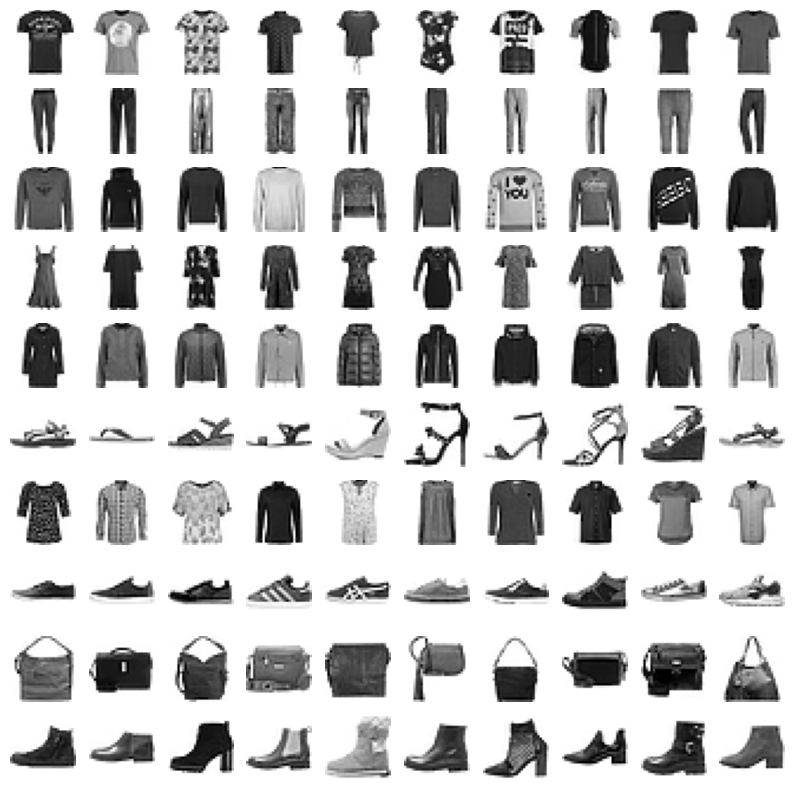

In [13]:
#show 100 training samples
#samples in row-n are from class-n
fig, ax = plt.subplots(10, 10, figsize=(10, 10))
# Plot images in the grid
for i in range(100):
    row = i // 10
    col = i % 10
    ax[row, col].imshow(X_train[n_samples*row+col], cmap=plt.cm.binary)
    ax[row, col].axis('off')
plt.show()

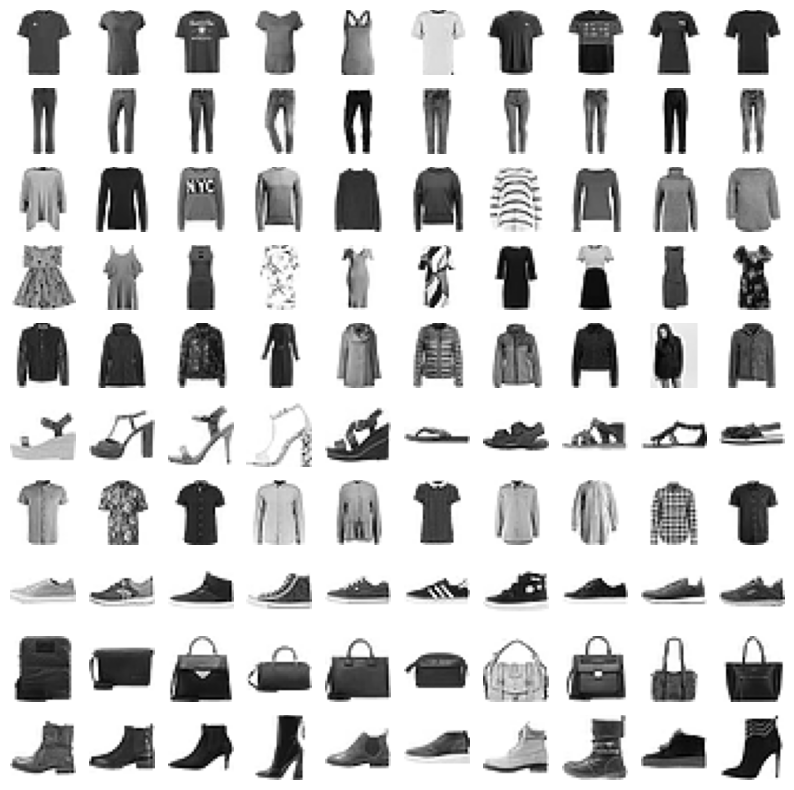

In [14]:
#show 100 val samples
#samples in row-n are from class-n
fig, ax = plt.subplots(10, 10, figsize=(10, 10))
# Plot images in the grid
for i in range(100):
    row = i // 10
    col = i % 10
    ax[row, col].imshow(X_val[n_samples*row+col], cmap=plt.cm.binary)
    ax[row, col].axis('off')
plt.show()

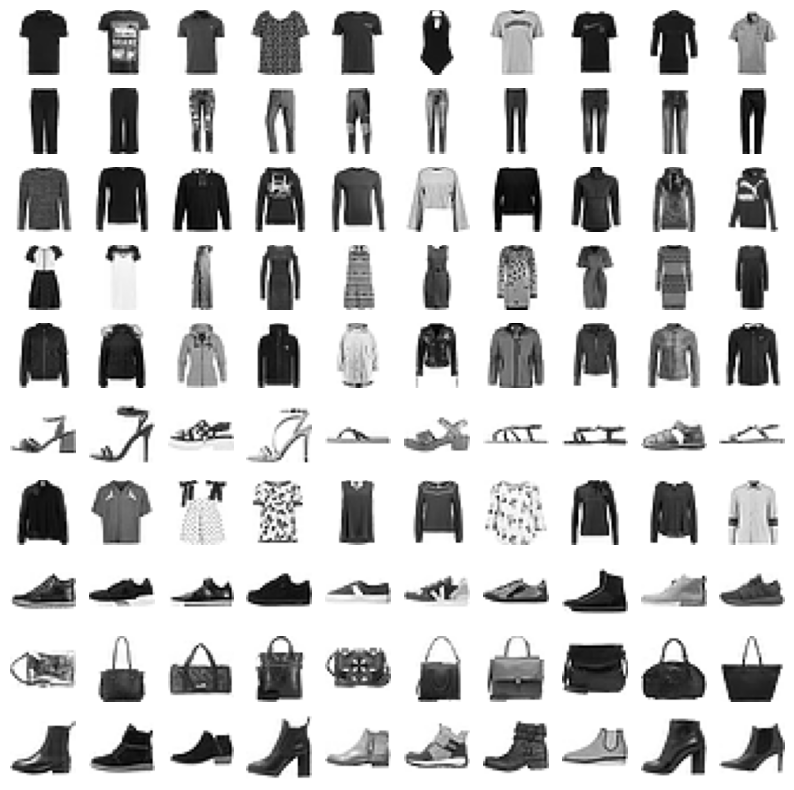

In [15]:
#show 100 test samples
#samples in row-n are from class-n
fig, ax = plt.subplots(10, 10, figsize=(10, 10))
# Plot images in the grid
for i in range(100):
    row = i // 10
    col = i % 10
    ax[row, col].imshow(X_test[n_samples*row+col], cmap=plt.cm.binary)
    ax[row, col].axis('off')
plt.show()

### Save the results to a file

In [16]:
torch.save({"X_train":X_train, "Y_train":Y_train,
            "X_val":X_val,     "Y_val":Y_val,
            "X_test":X_test,   "Y_test":Y_test,
            'other':[platform.node(), 
                     socket.gethostbyname(socket.gethostname()), 
                     getpass.getuser(),
                     datetime.now()]},
          "H5T0_train_val_test_data.pt")